In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score, silhouette_samples

from silhouette_graphs import silhouette_graphs
%load_ext autoreload
%autoreload 2

In [89]:
hikes = pd.read_csv('../data/wta-parks-data.csv', index_col=0, sep='\t')

In [92]:
hikes = hikes.iloc[hikes['description'].dropna().index]

In [93]:
hikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3251 entries, 0 to 3411
Data columns (total 34 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   name                                                       3251 non-null   object 
 1   url                                                        3251 non-null   object 
 2   length                                                     2149 non-null   float64
 3   highest point                                              1717 non-null   float64
 4   gain                                                       2014 non-null   float64
 5   lat                                                        2452 non-null   float64
 6   lon                                                        2452 non-null   float64
 7   pass: Discover Pass                                        3251 non-null   int64  
 8   pass: Na

# NLP

In [13]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(hikes['description'])
vocab = np.array(sorted(tfidf.vocabulary_))
V = tfidf_matrix

## NMF

In [22]:
n_comps = np.arange(1,30)
error = np.zeros(n_comps.shape)
for n in n_comps:
    nmf = NMF(n_components=n)
    nmf.fit(V)
    W = nmf.transform(V)
    H = nmf.components_
    error[n-1] = nmf.reconstruction_err_


Text(0, 0.5, 'Reconstruction Error')

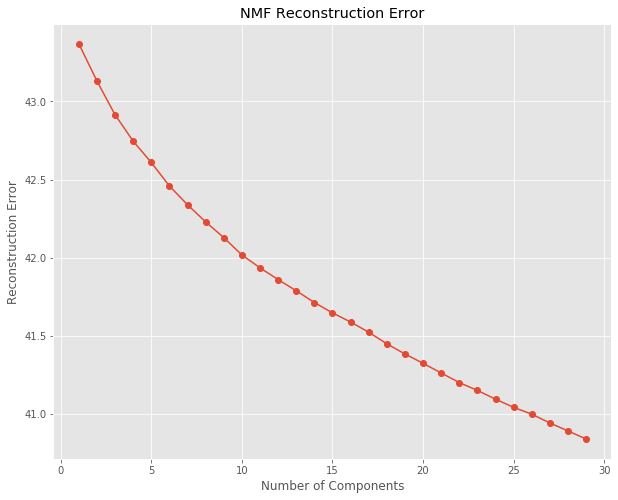

In [23]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(n_comps, error, marker='o')
ax.set_title('NMF Reconstruction Error')
ax.set_xlabel('Number of Components')
ax.set_ylabel('Reconstruction Error')

In [37]:
nmf = NMF(n_components=5)
nmf.fit(V)
W = nmf.transform(V)
H = nmf.components_

In [38]:
for idx, topic in enumerate(H):
    print(vocab[np.argsort(-topic)[:10]])

['trail' 'creek' 'miles' 'views' 'ridge' 'feet' 'mount' 'mile' 'pass'
 'junction']
['lake' 'trail' 'lakes' 'miles' 'junction' 'mile' 'pass' 'hike' 'shore'
 'campsites']
['gear' 'required' 'experience' 'finding' 'scramble' 'summit' 'expertise'
 'peak' 'route' 'climbing']
['park' 'trail' 'area' 'trails' 'loop' 'road' 'river' 'beach' 'falls'
 'parking']
['trail' 'tiger' 'mountain' 'squak' 'loop' 'west' 'tmt' 'access' 'poo'
 'trails']


In [39]:
nmf.reconstruction_err_

42.609392716925846

## Clustering

In [59]:
cluster = KMeans(n_clusters=2)
cluster.fit(tfidf_matrix)
centroids = cluster.cluster_centers_

In [77]:
for idx, topic in enumerate(centroids):
    print(vocab[np.argsort(-topic)[:15]])

['trail' 'lake' 'creek' 'miles' 'mile' 'road' 'hike' 'mountain' 'forest'
 'views' 'river' 'ridge' 'feet' 'way' 'trailhead']
['trail' 'required' 'park' 'gear' 'experience' 'area' 'peak' 'summit'
 'scramble' 'route' 'trails' 'expertise' 'finding' 'mountain' 'climbing']


In [78]:
cluster = KMeans(n_clusters=5)
cluster.fit(tfidf_matrix)
centroids = cluster.cluster_centers_

In [79]:
for idx, topic in enumerate(centroids):
    print(vocab[np.argsort(-topic)[:15]])

['trail' 'required' 'park' 'gear' 'area' 'experience' 'peak' 'summit'
 'scramble' 'route' 'trails' 'expertise' 'finding' 'mountain' 'climbing']
['island' 'trimble' 'tillicum' 'village' 'cassandra' 'estate' 'private'
 'ferry' 'fee' 'american' 'seattle' 'native' 'fulltime' 'argosy'
 'enactment']
['trail' 'lake' 'creek' 'miles' 'mile' 'road' 'hike' 'forest' 'mountain'
 'views' 'river' 'ridge' 'feet' 'way' 'trailhead']
['finch' 'arboretum' 'garden' 'extensive' 'spokane' 'ornamental'
 'extravaganza' 'walking' 'botanical' 'admission' 'produce' '65' 'glen'
 'highlights' 'dawn']
['perimeter' 'squak' 'connecting' 'loop' 'trail' 'chybinski' 'valley'
 'mountain' 'hike' 'seattle' 'extend' 'days' 'south' 'clear' 'rainier']


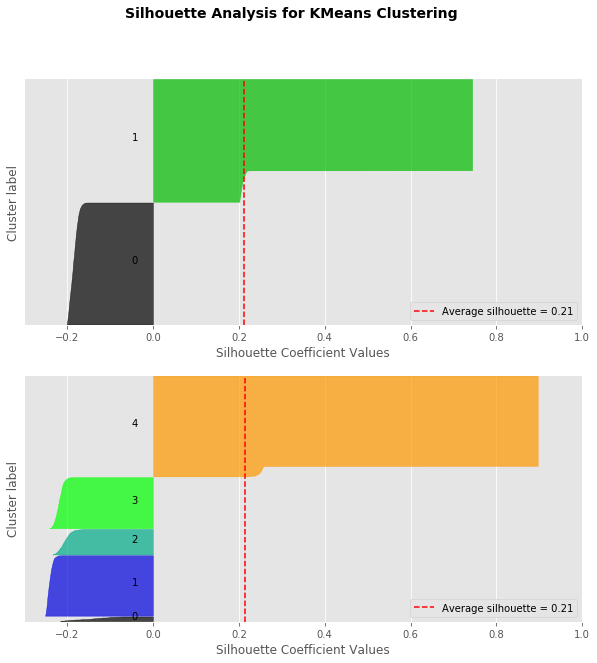

In [85]:
fig, sil_scores = silhouette_graphs(tfidf_matrix, [2, 5])

fig.show()

fig.savefig('../images/text_cluster_silhouette.png', dpi=300, bbox_inches='tight')

In [94]:
technical = np.argmin(cluster.transform(tfidf_matrix), axis=1)
technical = (technical == 4).astype(int)
hikes['technical'] = technical

In [95]:
hikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3251 entries, 0 to 3411
Data columns (total 35 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   name                                                       3251 non-null   object 
 1   url                                                        3251 non-null   object 
 2   length                                                     2149 non-null   float64
 3   highest point                                              1717 non-null   float64
 4   gain                                                       2014 non-null   float64
 5   lat                                                        2452 non-null   float64
 6   lon                                                        2452 non-null   float64
 7   pass: Discover Pass                                        3251 non-null   int64  
 8   pass: Na

In [96]:
hikes.to_csv('../data/wta-parks-data.csv', sep='\t')